# Tutorial Julia for Data Science

## 2 Algebra Lineare

Questo tutorial è sulle principali operazioni di algebra lineare su matrici svolgibili in Julia  
iniziamo di nuovo dichiarando i pacchetti usati:

In [3]:
#=using Pkg
Pkg.add("MAT")
Pkg.add("ImageMagick")
=#

using LinearAlgebra
using SparseArrays
using Images
using MAT
using ImageMagick

Iniziamo adesso con il creare una matrice quadrata 10x10 di numeri casuali 

In [4]:
A = rand(10,10)

10×10 Array{Float64,2}:
 0.988527  0.539458  0.859768  0.8877     …  0.233547  0.552271  0.26202
 0.785255  0.167827  0.643791  0.163486      0.399618  0.38699   0.272662
 0.564071  0.92976   0.504784  0.236271      0.243306  0.56844   0.832105
 0.966783  0.426906  0.471074  0.683519      0.77524   0.49073   0.115712
 0.604591  0.518917  0.839804  0.549203      0.503812  0.762233  0.0441193
 0.44563   0.879889  0.99654   0.594734   …  0.22127   0.407186  0.565563
 0.344955  0.778125  0.249083  0.0496875     0.108243  0.999413  0.256315
 0.31478   0.642252  0.679343  0.761693      0.368504  0.273959  0.104328
 0.371935  0.22715   0.407193  0.0510328     0.622791  0.241747  0.922405
 0.329569  0.862032  0.194336  0.0860645     0.798313  0.112692  0.0648904

Iniziamo dalla trasposta:

In [7]:
Atranspose = A'
A = A*Atranspose; 
@show typeof(Atranspose)

typeof(Atranspose) = Adjoint{Float64,Array{Float64,2}}


Adjoint{Float64,Array{Float64,2}}

In Julia, le trasposte sono salvatr con tipo Adjoint, difatti, molto spesso,  
quando vogliamo fare operazioni su trasposte non vogliamo veramente la trasposta.  
In questo modo possiamo anche risalire velocemente alla matrice parente:

In [8]:
Atranspose.parent

10×10 Array{Float64,2}:
  98.1614  66.3704  83.0867  83.2476  …  74.0581  80.4218  78.1164  74.3984
  66.3704  45.2918  56.6355  56.7783     50.5003  54.4236  53.5577  50.7803
  83.0867  56.6355  71.9829  70.8943     64.3933  68.5001  67.8378  64.3146
  83.2476  56.7783  70.8943  71.8267     63.4566  68.4016  66.6536  63.7263
  82.9197  56.1983  70.4319  70.7016     63.0379  68.065   66.1024  63.1556
 100.218   67.8086  85.7916  84.753   …  76.5853  82.5778  80.9993  77.0693
  74.0581  50.5003  64.3933  63.4566     58.1175  61.2518  60.4612  57.7027
  80.4218  54.4236  68.5001  68.4016     61.2518  66.3099  64.6085  61.8251
  78.1164  53.5577  67.8378  66.6536     60.4612  64.6085  65.0197  61.3328
  74.3984  50.7803  64.3146  63.7263     57.7027  61.8251  61.3328  58.8202

Se invece vogliamo proprio la trasposta, possiamo attenerla con copy:

In [ ]:
B = copy(Atranspose)

Risolviamo adesso un semplice sistema lineare Ax=b  

In [9]:
b = rand(10)
x = A\b
@show norm(A*x-b)
# norma ≈ 0 -> Ax ≈ b

norm(A * x - b) = 1.3032505874923242e-6


1.3032505874923242e-6

Come spiegato nella lezione di introduzione, \ calcola soluzione a norma minima.  
norma(Ax-b) ≈ 0 -> Ax ≈ b

## Fattorizzazioni
Uno strumento molto usato per aiutare a risolvere Ax=b sono le fattorizzazioni, queste sono alcune delle più usate: 

### Fattorizzazione LU  
La fattorizzazione LU prende la matrice e la fattorizza in:   
+ una matrice triangolare inferiore (L)  
+ una matrice triangolare supertiore (U)
+ una matrice di permutazione (P)  

Tali che L\*U=A\*P

La funzione lu fa tutto ciò in automatico

In [13]:
luA = lu(A)

LU{Float64,Array{Float64,2}}
L factor:
10×10 Array{Float64,2}:
 1.0        0.0         0.0         …   0.0        0.0       0.0
 0.78724    1.0         0.0             0.0        0.0       0.0
 0.829819   0.181689    1.0             0.0        0.0       0.0
 0.745691   0.597058   -0.144436        0.0        0.0       0.0
 0.749857   0.74357     0.0164819       0.0        0.0       0.0
 0.824283  -0.187711    0.595788    …   0.0        0.0       0.0
 0.833844   0.553918   -0.00822521      0.0        0.0       0.0
 0.973096  -0.426839    0.686545        1.0        0.0       0.0
 0.661519   0.20345     0.594364        0.390596   1.0       0.0
 0.801543  -0.0796315   0.312695       -0.126468  -0.261098  1.0
U factor:
10×10 Array{Float64,2}:
 70273.8  47773.4      60220.7      …  56856.4          54156.1
     0.0      1.38192      3.23122         5.11916          4.07303
     0.0      0.0         -2.53882        -3.95171         -2.92796
     0.0      0.0          0.0            -1.43803   

Possiamo accedere alle varie componenti indicizzando il risultato

In [15]:
luA.P
luA.L
luA.U

10×10 Array{Float64,2}:
 70273.8  47773.4      60220.7      …  56856.4          54156.1
     0.0      1.38192      3.23122         5.11916          4.07303
     0.0      0.0         -2.53882        -3.95171         -2.92796
     0.0      0.0          0.0            -1.43803         -0.719376
     0.0      0.0          0.0             0.605356         0.953953
     0.0      0.0          0.0      …      0.317182         0.520554
     0.0      0.0          0.0            -0.000411476      0.00707474
     0.0      0.0          0.0             0.000299513      0.00944813
     0.0      0.0          0.0            -6.21046e-5       1.62959e-5
     0.0      0.0          0.0             0.0             -0.000202381

### Fattorizzazione QR
la fattorizzazione QR scompone una matrice quadrata in:

+ matrice ortogonale (Q)
+ matrice triangolare superiore (R)

Tali che QR=A  
qr(), similarmente a lu() svolge questo compuito

In [16]:
qrA = qr(A)

LinearAlgebra.QRCompactWY{Float64,Array{Float64,2}}
Q factor:
10×10 LinearAlgebra.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.372388   0.495625    0.00547778  …   0.575513   -0.248045     0.0161396
 -0.253152  -0.0135306   0.368757        0.0849198   0.69433      0.172115
 -0.319098  -0.228254   -0.174716        0.29023    -0.119254     0.264637
 -0.317558   0.0352257   0.689887       -0.133215   -0.0091548   -0.354658
 -0.31544    0.296399    0.101555       -0.359562   -0.465892     0.0571855
 -0.382684   0.197901   -0.513656    …  -0.231175    0.299805    -0.574936
 -0.285364  -0.276328   -0.249345       -0.0355177   0.095453    -0.0302625
 -0.306737   0.215163   -0.127263       -0.344545    0.183112     0.659197
 -0.301264  -0.554187    0.0687427      -0.290658   -0.304049     0.0212856
 -0.286958  -0.379524   -0.0163968       0.415225   -0.00703365  -0.0676025
R factor:
10×10 Array{Float64,2}:
 -1.83634e5  -1.24839e5  -1.57364e5  …  -1.48572e5    -1.41517e5
  0.0        -1.94642   

### factorize()
in Julia factorize() decide direttamente quale fattorizzazione è più utile per la matrice di input, basandosi sulle  
caratteristiche della matrice.

Come già detto nel tutorial per la parte introduttiva, queste caratteristiche si possono esplicitare, forzando Julia a  trattarle come tali.

In [18]:
factorize(A)

Cholesky{Float64,Array{Float64,2}}
U factor:
10×10 UpperTriangular{Float64,Array{Float64,2}}:
 261.502  177.771     224.08     222.999     …  211.556       201.511
    ⋅       0.825919    1.5388     0.91303        2.25097       1.79448
    ⋅        ⋅          1.45542   -0.476974       1.57571       1.37789
    ⋅        ⋅           ⋅         0.769685      -0.755096     -0.0190285
    ⋅        ⋅           ⋅          ⋅            -0.232582     -0.175816
    ⋅        ⋅           ⋅          ⋅        …    0.704618      1.13369
    ⋅        ⋅           ⋅          ⋅             0.0210911     0.0236636
    ⋅        ⋅           ⋅          ⋅             0.00459147    0.121173
    ⋅        ⋅           ⋅          ⋅             0.01145       0.00360521
    ⋅        ⋅           ⋅          ⋅              ⋅            0.0444232

## Matrici Sparse
Una matrice sparsa è una matrice che presenta valori nulli nella stragrande maggiopranza dei campi.  

Julia stora tali matrici comprimendone via i valori vuoti e salvando solo i valori significiativi:

In [20]:
S = sprand(5,5,2/5)
Matrix(S)

5×5 Array{Float64,2}:
 0.0548109  0.0        0.0       0.0        0.483132
 0.0        0.46461    0.0       0.0        0.852864
 0.121484   0.0        0.498656  0.0758402  0.0
 0.698597   0.0        0.370004  0.0        0.0
 0.0        0.0934195  0.0       0.0        0.998379

La matrice sparsa è in realtà salvata con 3 array:  

+ S.colptr è un array in cui S.colptr[i] indica a che indice iniziano i valori per la colonna i
+ S.rowval è un array in cui S.rowval[i] indica in che riga posizionare il valore S.nzval[i]
+ S.nzval è un array contenente tutti i valori non nulli della matrice

Se, ad esempio, S.colptr[1]=1 e S.colptr[2]=4 allora sappiamo che i primi 3 elementi di S.nzval[] saranno tutti nella prima colonna della matrice effettiva e, guardando i valori di S.rowval[1], S.rowval[2] e S.rowval[3] vedremo in che riga sono questi valori.

Presenta anche altre informazioni come S.m, S.n per le sue grandezze

# Immagini come matrici

In Julia, le immagini sono in realtà matrici, proviamo quindi a fare delle trasformazioni su di esse.  
Innanzitutto scarichiamo in locale e carichiamo in julia un immagine:

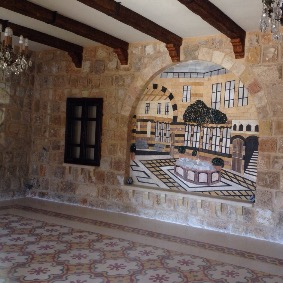

In [23]:
download("https://github.com/JuliaAcademy/DataScience/raw/master/data/khiam-small.jpg","downloads/khiam-small.jpg")
X1 = load("downloads/khiam-small.jpg")

In [24]:
@show typeof(X1)
X1[1,1] # this is pixel [1,1]

typeof(X1) = Array{RGB{Normed{UInt8,8}},2}


Come già accennato, l'immagine è una matrice di RGB (colori di pixel)  
Possiamo facilmente estrarre i layer con facilità e, azzerando gli altri layer, mostrare solo tonalità di verde rosso o blu:

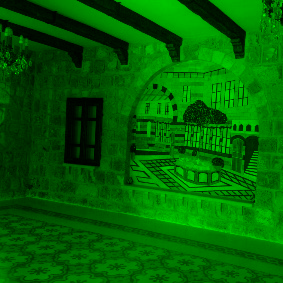

In [26]:
R = map(i->X1[i].r,1:length(X1))
R = Float64.(reshape(R,size(X1)...))

G = map(i->X1[i].g,1:length(X1))
G = Float64.(reshape(G,size(X1)...))

B = map(i->X1[i].b,1:length(X1))
B = Float64.(reshape(B,size(X1)...))

Z = zeros(size(R)...) # just a matrix of all zeros of equal size as the image
RGB.(Z,G,Z)

Per semplcità nella manipolazione dei dati, convertiamo l'immagine in scala grigio e convertiamone i valori:


In [28]:
Xgray = Gray.(X1)
Xgrayvalues = Float64.(Xgray)

283×283 Array{Float64,2}:
 0.101961   0.0627451  0.0784314  0.0941176  …  0.509804  0.552941  0.666667
 0.0666667  0.0980392  0.0745098  0.054902      0.505882  0.584314  0.501961
 0.0784314  0.0862745  0.0784314  0.0862745     0.6       0.701961  0.611765
 0.0862745  0.0666667  0.0745098  0.0941176     0.658824  0.705882  0.145098
 0.0784314  0.101961   0.0901961  0.0745098     0.713725  0.682353  0.231373
 0.0745098  0.0745098  0.0784314  0.0862745  …  0.729412  0.701961  0.168627
 0.12549    0.0980392  0.0862745  0.0862745     0.627451  0.466667  0.192157
 0.439216   0.447059   0.305882   0.137255      0.231373  0.184314  0.137255
 0.458824   0.454902   0.45098    0.454902      0.196078  0.101961  0.117647
 0.45098    0.466667   0.458824   0.45098       0.584314  0.121569  0.137255
 0.458824   0.458824   0.458824   0.454902   …  0.521569  0.513725  0.12549
 0.466667   0.45098    0.458824   0.47451       0.576471  0.741176  0.117647
 0.45098    0.45098    0.462745   0.458824      0.5

Adesso facciamo il downsampling dell'immagine tramite trasformazione SVD

In [32]:
SVD_V = svd(Xgrayvalues);

In [33]:
norm(SVD_V.U*diagm(SVD_V.S)*SVD_V.V' - Xgrayvalues)

8.968403663838798e-13

Usando tutti i vettori della decomposizione otteniamo matrice quasi identica a quella originaria, proviamo usandone solo 4:

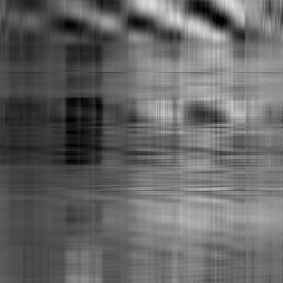

In [34]:
i = 1:4
u1 = SVD_V.U[:,i]
v1 = SVD_V.V[:,i]
img1 = u1*spdiagm(0=>SVD_V.S[i])*v1'
Gray.(img1)

Alzando a 100 otteniamo qualcosa di visivamente molto simile all originale:

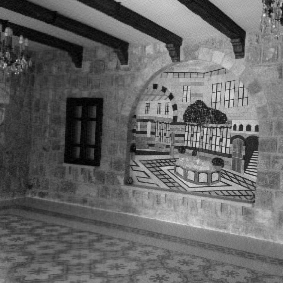

In [35]:
i = 1:100
u1 = SVD_V.U[:,i]
v1 = SVD_V.V[:,i]
img1 = u1*spdiagm(0=>SVD_V.S[i])*v1'
Gray.(img1)

Ma con norma sulla differenza alta:

In [36]:
norm(Xgrayvalues-img1)

5.528187095958997

Proviamo adesso a sperimentare sulla ricerca delle immagini, iniziamo scaricando un piccolo dizionario di immagini:

In [39]:
download("https://github.com/JuliaAcademy/DataScience/blob/master/data/face_recog_qr.mat?raw=true", 
    "downloads/face_recog_qr.mat")
M = matread("downloads/face_recog_qr.mat")

Dict{String,Any} with 1 entry:
  "V2" => [0.08103 0.0729089 … 0.0529805 0.0594823; 0.089725 0.082329 … 0.05180…

Prendiamo una di queste immagini, rimpiccioliamola e vediamola sempre in scala grigio:

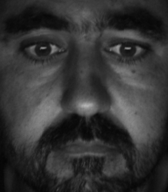

In [40]:
q = reshape(M["V2"][:,1],192,168)# rimpiccioliamo immagine per vederla
Gray.(q)

Torniamo alla versione vettorizzata, cerchiamo le immagini più simili ad essa.  
Usiamo b = q[:] come immagine di query

In [41]:
b = q[:]

32256-element Array{Float64,1}:
 0.0810300261581645
 0.08972497847335578
 0.0873803822279144
 0.0841839709221837
 0.08923537113064388
 0.08721125794763387
 0.09061926007535659
 0.09874041385097843
 0.08932030421406685
 0.08584587638761629
 0.09319940629980634
 0.08927783767235538
 0.0994655711726987
 ⋮
 0.10334467325843819
 0.09275226549880594
 0.0846311117231841
 0.07561567634556146
 0.06385097046320852
 0.06110169995847822
 0.05023127567812609
 0.03478055114733056
 0.027342088151717514
 0.028961527075438608
 0.024761941927267744
 0.027064071630997635

Nota che : vettorizza la matrice per colonna.

Rimuoviamo ora la prima immagine dal dizionario, ciò significa risolvere un sistema lineare Ax=b dove A è la matrice/dizionario con tutte le immagini.  


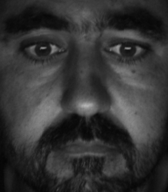

In [42]:
A = M["V2"][:,2:end]
x = A\b #Ax=b
Gray.(reshape(A*x,192,168))

Per questo tipo di problema voglkiamo minimizzare la norma, anche se \, per matrici non invertibili, cerca soluzione per quadrati minimi.

In [43]:
norm(A*x-b)

3.788571908461458e-14

Per ora tutto facile  
Proviamo adesso aggiungendo delle distorsioni all'immagine da cercare

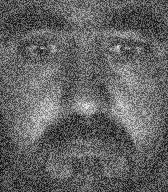

In [44]:
qv = q+rand(size(q,1),size(q,2))*0.5
qv = qv./maximum(qv)
Gray.(qv)

Riproviamo a cercare quest adesso:

norm(A * x - b) = 22.38010181137273


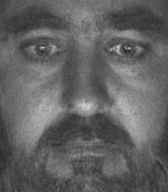

In [45]:
b = qv[:];
x = A\b
@show norm(A*x-b)
Gray.(reshape(A*x,192,168))

Da notare l'errore molto superiore (dato dalla distorsione che abbiamo messo noi)  
Siamo comunque riusciti a trovare l'immagine semplicemente con \